# Libraries

In [184]:
%matplotlib notebook
# this is necessary for jupyter notebook to be able to display the animation


import networkx as nx                     # package to create and manipulate graphs
import matplotlib.pyplot as plt           # package to visualize the graphs
import numpy as np
import matplotlib.animation as animation  # package to create animations

# Create an animation to dynamically change node sizes

<IPython.core.display.Javascript object>


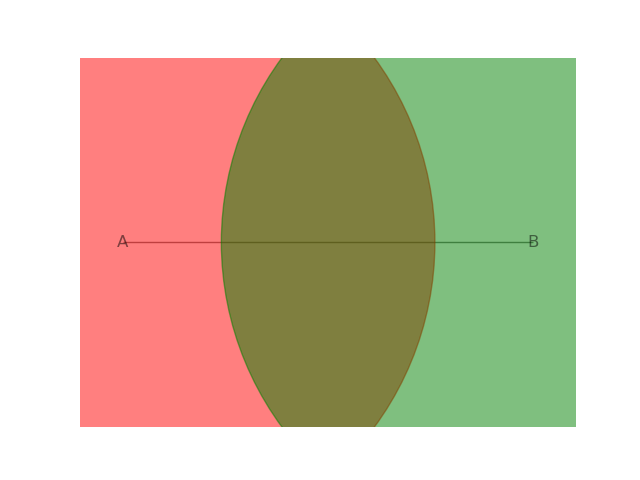

In [191]:
# Create a graph
G=nx.Graph()

# specify node colors
node_colors = ['r', 'g']

# Create the animate function that generates each frame, denoted by i
def animate(i, a, b):
    global node_colors
    ax.clear()
    node_sizes = [1000*np.sin(200*i)+ i**2 + a, 1000*np.cos(100*i) + i**2 + b]
    G.add_node("A", size = node_sizes[0], culture ="chinese")
    G.add_node("B", size = node_sizes[1], culture ="Indian")
    G.add_edge("A", "B")
    pos = {"A":(1,0),"B":(2,0)}

    node_labels={n:(d["size"],d["culture"]) for n,d in G.nodes(data=True)}

    nx.draw(G, pos = pos, with_labels=True, node_color = node_colors, node_size = node_sizes, alpha = 0.5)
    #nx.draw_networkx_labels(G,labels=node_labels)

# figure
fig, ax = plt.subplots()

# call the animation function
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=100, repeat=True,fargs=(2, 1))
plt.show()

#anim.save('two_nodes.mp4')

# Create an animation showing dynamic deletion of nodes

<IPython.core.display.Javascript object>


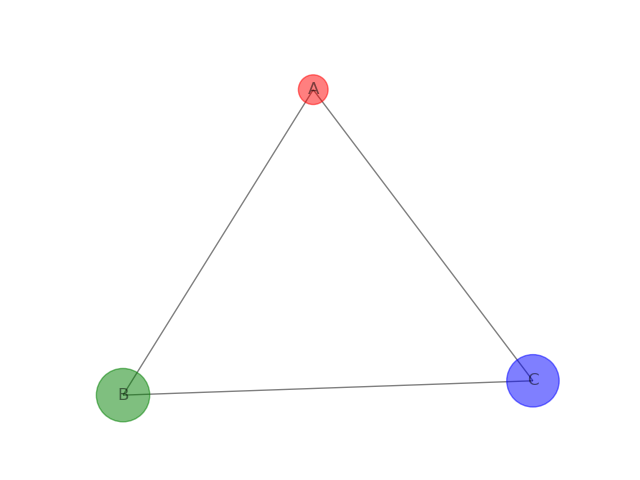

In [194]:
# Create a graph
G=nx.Graph()

# list of nodes
nodes = ["A", "B", "C"]

# list of edges
edges = ["AB", "BC", "CA"]

# specify node colors
node_colors = ['r', 'g', 'b']

G.add_nodes_from(nodes)
    
G.add_edges_from(edges)

pos = nx.spring_layout(G)

# Create the animate function that generates each frame, denoted by i
def animate(i):
    global nodes, edges, pos, node_colors
    
    ax.clear()
    
    node_sizes = [2000*np.cos(100*i) + i**2, 500*np.cos(10*i)+ i**2, 2000*np.sin(i) + 10*i ]

    if i==50:
        G.remove_node('A')
        node_sizes.pop(ord('A')- 65)
        node_colors.pop(ord('A')- 65)
        pos = nx.spring_layout(G)
        
    if i>50:
        node_sizes.pop(ord('A')- 65)
    
    nx.draw(G, pos= pos, with_labels=True, node_color = node_colors, node_size = node_sizes, alpha = 0.5)

# figure
fig, ax = plt.subplots()

# call the animation function
anim = animation.FuncAnimation(fig, animate, frames=200, interval=100, repeat=True)
plt.show()


# Appendix

# 1) Remove the ith item of a list and dictionary

In [187]:
# Delete items from a list
####################################

lst = ['Iris', 'Orchids', 'Rose', 'Lavender',
    'Lily', 'Carnations']
print("Original List is :", lst)
 
# using pop() to delete item
# ('Orchids' at index 1) from the list
a = lst.pop(1)
print("Item popped :", a)
print("After deleting the item :", lst)


# Delele items from a dictionary
#################################################
my_dictionary = {"A":(0,0),"B":(1,0), "C":(0.5,1)}

key_removed = my_dictionary.pop('A')
print("Key popped :", key_removed)
print("After deleting the item :", my_dictionary)
    

Original List is : ['Iris', 'Orchids', 'Rose', 'Lavender', 'Lily', 'Carnations']
Item popped : Orchids
After deleting the item : ['Iris', 'Rose', 'Lavender', 'Lily', 'Carnations']
Key popped : (0, 0)
After deleting the item : {'B': (1, 0), 'C': (0.5, 1)}


# 2) Dynamic removal of the ith item in a list

In [188]:
import time
for i in range(10):
    my_list = [i**3, i**2, i]
    
    if my_list[0]>50:
        my_list.pop(0)
    
    print(my_list)
    time.sleep(0.1)


[0, 0, 0]
[1, 1, 1]
[8, 4, 2]
[27, 9, 3]
[16, 4]
[25, 5]
[36, 6]
[49, 7]
[64, 8]
[81, 9]


# 3) Convert alphabets to numbers

In [189]:
number = ord('A')
print(number)  # 👉️ 65

one_based = ord('A') - 65
print(one_based)  # 👉️ 1

65
0


# 4) Execute a particular section of a function only once

In [190]:
sum_has_run = True

def sum(a, b, i):
    global sum_has_run
    
    c = i
    
    if i>5:
        c = 0
        if sum_has_run:
            c = 100
            sum_has_run = False

    print(a+b+c, i)


for i in range(10):
    sum(100,100, i)

200 0
201 1
202 2
203 3
204 4
205 5
300 6
200 7
200 8
200 9
